# 中心極限定理

## 分布収束

確率変数の列$\{U_i\}_{i=1,2,\dots}$が確率変数$U$に**分布収束**（convergence in distribution）するとは、

$$
\lim_{n\to \infty}
P(U_i \leq x) = P(U \leq x) = F_U(x)
$$

が、$F_U(x)$の連続点で成り立つことをいい、$U_i \to_d U$と表す。分布収束の代表例は中心極限定理である。


## 中心極限定理

**中心極限定理**（central limit theorem: CLT）とは、一言でいうと、

> 標本数が十分に大きければ、元の分布がどんな分布であっても、その標本平均の分布は$N(\mu, \frac{\sigma}{\sqrt{n}})$の正規分布になる

という定理。

### シミュレーションで確かめる中心極限定理

例えば、0から1の範囲の値をとる一様分布$Uniform(0, 1)$の母集団があったとする。母平均は$1/2 = 0.5$である。

標本を100個得られたとして、ヒストグラムと標本平均を描くと次のようになる。

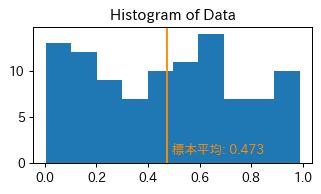

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

np.random.seed(0)

n = 100
x = np.random.uniform(low=0, high=1, size=n)

fig, ax = plt.subplots(dpi=90, figsize=[4, 2])
ax.hist(x)
ax.set(title="Histogram of Data")
ax.axvline(x.mean(), color="darkorange")
ax.text(x.mean() + 0.02, 1, f"標本平均: {x.mean():.3f}", color="darkorange")
fig.show()

「調査を行って標本をとって平均を計算する」という作業をたくさん繰り返したとすると、この標本平均の分布は正規分布に近づいていき、その平均値は母平均に近づいていく。

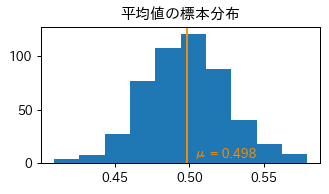

In [200]:
n_trial = 500
mean_values = []

for trial_i in range(n_trial):
    x = np.random.uniform(size=n)
    mean_values.append(x.mean())

fig, ax = plt.subplots(dpi=90, figsize=[4, 2])
ax.hist(mean_values)
ax.set(title="平均値の標本分布")

mu = np.array(mean_values).mean()
ax.axvline(mu, color="darkorange")
ax.text(mu + 0.005, 5, f"μ = {mu:.3f}", color="darkorange")
fig.show()

## もう少し詳しい話

**定理 （中心極限定理）**

$X_1, X_2, \dots, i.i.d. \sim (\mu, \sigma^2)$とする。このとき、次の分布収束が成り立つ。

$$
\lim_{n\to\infty}
P \left( \frac{ \sqrt{n}(\bar{X} - \mu) }{\sigma} \leq x \right)
= \int^x_{-\infty} \frac{1}{\sqrt{2\pi}} e^{-y^2/2} dy
= \Phi(x)
$$

ここで$\Phi(x)$は標準正規分布の累積分布関数

**（証明）** $Z_i = (X_i - \mu)/\sigma, i=1,2,\dots$とおくと、$E[Z_i]=0, Var(Z_i) = 1, E[\bar{Z}]=0, Var(\bar{Z})=n^{-1}$となる。

TODO: 続き書く


:::{note} 特性関数

:::

## 標本和の標本分布

標本和$X_1 + X_2 + \cdots + X_n$や標本平均$\bar{X}$の具体的な標本分布は母集団分布に依存する。


ある分布に従う2つ以上の確率変数の和が元の分布と同じ分布に従うことを**再生性**をもつという。二項分布、ポアソン分布、正規分布は再生性をもつ。

### 二項母集団

母集団が二項分布のとき、中心極限定理で正規分布に近似して解く事が多い。

### 正規母集団

母集団が平均$\mu$、分散$\sigma^2$の正規分布のとき、標本和は正規分布$N(n\mu, n\sigma^2)$に従い、標本平均は$N(\mu, \sigma^2/n)$に従う。

### ポアソン母集団

母集団が平均$\lambda$のポアソン分布$Po(\lambda)$、標本和はポアソン分布$Po(\lambda)$に従う。ただし、$f(x) = e^{-\lambda} \lambda^x / x!$ であり、あまり大きな$\lambda$を扱うのは現実的ではない（例えば$e^{-100}$は`3.72e-44`という極めて小さな値になってしまう）。そのため中心極限定理を使って扱う場合も多い。

